In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Other'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'GS-PC', 'name': 'The Goldman Sachs Group Inc. PFD 1/1000 C', 'last_day_data_date': '2024-06-14', 'adjusted_close': 24.11, 'refund_1d': 0.11, 'refund_1d_p': 0.46, 'refund_5d': 0.35, 'refund_5d_p': 1.47, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 9317111808, 'earnings_share': None, 'dividend_yield': 0.1277, 'sector': 'Other', 'industry': 'Other', 'avgvol_1d': 13626, 'avgvol_200d': 16014}, {'code': 'SFB', 'name': 'Stifel Financial Corporation 5.20% Senior Notes due 2047', 'last_day_data_date': '2024-06-14', 'adjusted_close': 21.77, 'refund_1d': 0.27, 'refund_1d_p': 1.26, 'refund_5d': 0.2, 'refund_5d_p': 0.93, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 6987588000, 'earnings_share': None, 'dividend_yield': 0.013, 'sector': 'Other', 'industry': 'Other', 'avgvol_1d': 57152, 'avgvol_200d': 27997.9}, {'code': 'OAK-PB', 'name': 'Oaktree Capital Group LLC', 'last_day_data_date': '2024-06-14', 'adjusted_close': 21.15, 'refund_1d':

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

GS-PC
SFB
OAK-PB
PCG-PC
GAB-PG
PCG-PI
PBI-PB
WRB-PE
TY-P
HF
RCC
RCB
GGT-PE
DLNG-PA
XPCKX
AHL-P-C
AHL-P-D
AHT-P-D
AHT-P-F
AHT-P-G
ALL-P-B
APO-P-A
AXS-P-E
BAC-P-E
BAC-P-L
BCV-P-A
BML-P-G
BML-P-H
BML-P-J
BML-P-L
C-P-N
CDR-P-B
CIM-P-A
CIM-P-B
CIO-P-A
CMRE-P-B
CMRE-P-C
CMRE-P-D
CMS-P-B
CUBI-P-E
CUBI-P-F
DLNG-P-A
DSX-P-B
EP-P-C
EPR-P-C
EPR-P-E
EQC-P-D
GAB-P-G
GAB-P-H
GAM-P-B
GGN-P-B
GLOP-P-A
GLU-P-A
GS-P-A
GS-P-C
GS-P-D
GSL-P-B
GUT-P-C
HL-P-B
IVR-P-B
KEY-P-I
LXP-P-C
MAA-P-I
MER-P-K
MET-P-A
MFA-P-B
MITT-P-A
MITT-P-B
MS-P-A
MS-P-E
MS-P-F
MS-P-I
MS-P-K
NEE-P-R
NGL-P-B
NTEST
NYCB-P-A
NYCB-P-U
PBI-P-B
PCG-P-A
PCG-P-B
PCG-P-C
PCG-P-D
PCG-P-E
PCG-P-G
PCG-P-H
PCG-P-I
PMT-P-A
PSA-P-F
PSA-P-S
RF-P-B
SB-P-C
SB-P-D
SCE-P-G
SCE-P-H
SCE-P-J
SCE-P-K
SCHW-P-D
SLG-P-I
SPG-P-J
SPLP-P-A
STT-P-G
TNP-P-E
TWO-P-A
USB-P-A
USB-P-H
VNO-P-L
WFC-P-L
WFC-P-Y
RLJ-P-A
ARGD
ECF-P-A
KIM-P-M
QVCD
AHT-P-H
AHT-P-I
ASB-P-E
BAC-P-B
BAC-P-K
BFS-P-D
BHR-P-B
CDR-P-C
CHMI-P-A
CIM-P-C
CMRE-P-E
CODI-P-A
CODI-P-B
DLNG-P-B
DLR-P-J
EPR-

In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [12]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


GS-PC Share probably zero: float division by zero
SFB Share probably zero: float division by zero
OAK-PB Share probably zero: float division by zero
PCG-PC Share probably zero: float division by zero
GAB-PG has no debt data in database
PCG-PI price error: list index out of range
PBI-PB Share probably zero: float division by zero
WRB-PE Share probably zero: float division by zero
TY-P has no debt data in database
HF debt: 'Financials'
RCC Share probably zero: float division by zero
RCB Share probably zero: float division by zero
GGT-PE has no debt data in database
DLNG-PA Share probably zero: float division by zero
XPCKX debt: 'Financials'
AHL-P-C has no debt data in database
AHL-P-D has no debt data in database
AHT-P-D has no debt data in database
AHT-P-F has no debt data in database
AHT-P-G has no debt data in database
ALL-P-B has no debt data in database
APO-P-A has no debt data in database
AXS-P-E has no debt data in database
BAC-P-E has no debt data in database
BAC-P-L has no debt 

In [13]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

0
0
0
0
0


In [14]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [15]:
df = pd.read_csv('Other.csv')

In [16]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(50,'Debt'))
top_50s.append(positive_df.nlargest(50,'Dividend Yield'))
top_50s.append(positive_df.nlargest(50,'EPS Yield'))
top_50s.append(positive_df.nlargest(50,'FCF'))
worst_100s.append(positive_df.nlargest(100, 'Debt'))
worst_100s.append(positive_df.nsmallest(100, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(100, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(100, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

TypeError: Column 'Debt' has dtype object, cannot use method 'nsmallest' with this dtype

In [ ]:
print(final_selection.shape)
print(final_selection)

(21, 5)
      Code       Debt  Dividend Yield  EPS Yield        FCF
14      TK 0.21399358      0.62622657 0.22870879 0.89904372
15     TNK 0.21605751      0.03947092 0.23004225 0.33253777
20     SOI 0.35666730      0.06580272 0.08773777 0.15862111
21    ARLP 0.39695505      0.14602976 0.23640297 0.18517066
23     TXO 0.40627627      0.12828169 0.10493601 0.14030491
24     PBR 0.43174823      0.22165334 0.27257019 0.33758975
25   PBR-A 0.43174823      0.21572953 0.26528559 0.32856747
27     CNQ 0.44116804      0.04942480 0.19496855 0.11242947
30    EQNR 0.51919996      0.13897650 0.12324050 0.10192563
34      HP 0.61882006      0.04452960 0.08629559 0.08698496
35     NRP 0.61903901      0.07385439 0.14837974 0.26180941
41    INSW 0.70985628      0.10716092 0.19858513 0.17860622
42      SU 0.71901458      0.05882000 0.14097384 0.16985580
48     DVN 0.82252213      0.04960091 0.10844201 0.08897024
49     TTE 0.83365465      0.04761377 0.12988522 0.13538124
66     LPG 1.43329937      0.138

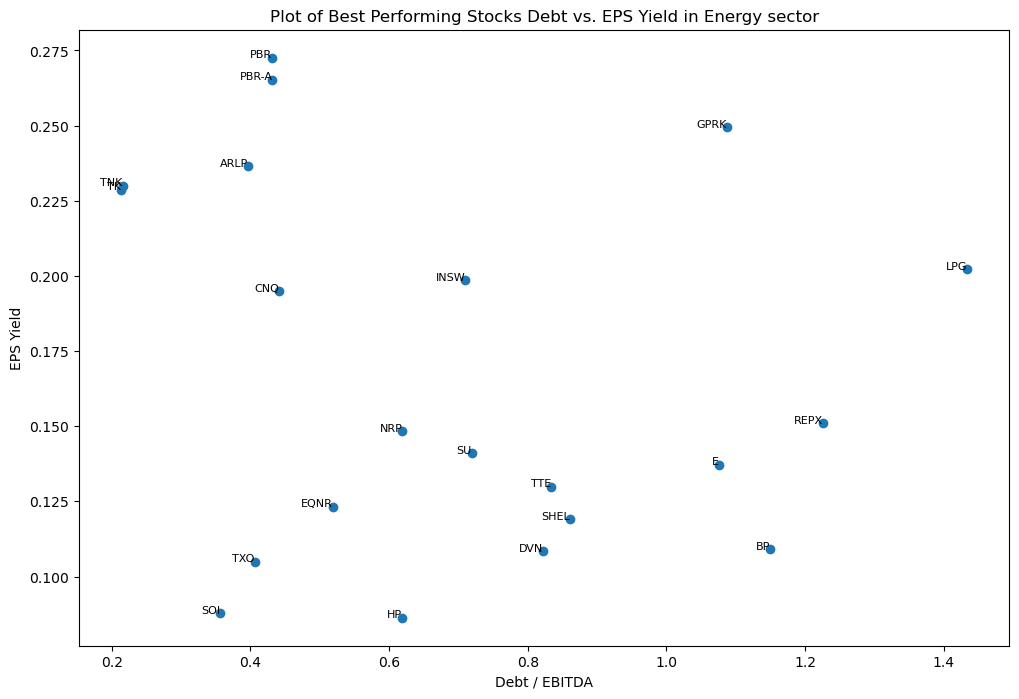

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('EPS Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield']) 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=8, ha='right')
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title)
plt.savefig('Best_Debt_EPS_fixed.png')
plt.show()

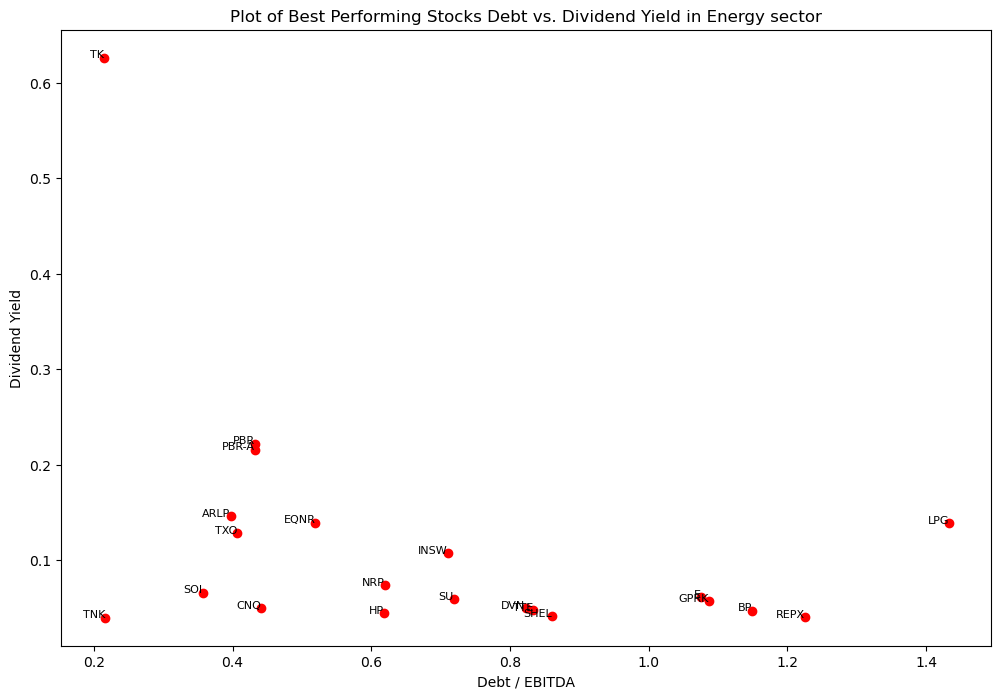

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('Dividend Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['Dividend Yield'], c='r') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title)
plt.savefig('Best_Debt_Div_fixed.png')
plt.show()

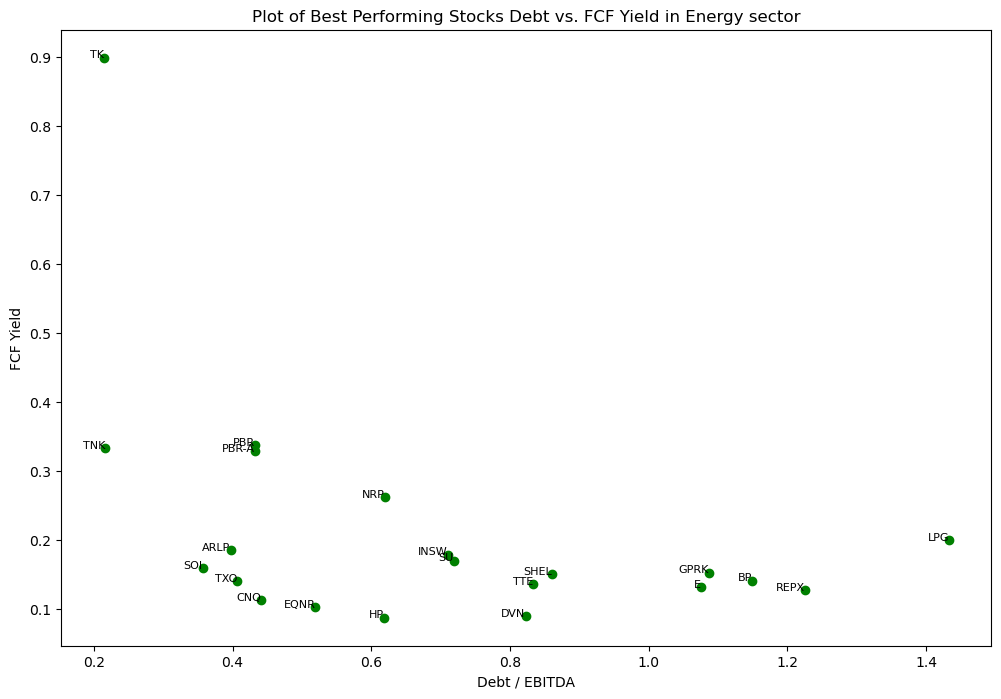

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA')
plt.ylabel('FCF Yield')
scatter = plt.scatter(final_selection['Debt'], final_selection['FCF'], c='g') 

for i, row in final_selection.iterrows():
    plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=8, ha='right')

plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title)
plt.savefig('Best_Debt_FCF_fixed.png')
plt.show()

In [ ]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [ ]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [ ]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


TK
TNK
SOI
ARLP
TXO
PBR
PBR-A
CNQ
EQNR
HP
NRP
INSW
SU
DVN
TTE
LPG
GPRK
REPX
E
SHEL
BP


In [ ]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue


In [ ]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [ ]:
all_returns.append(GSPC_returns)

In [ ]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [ ]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

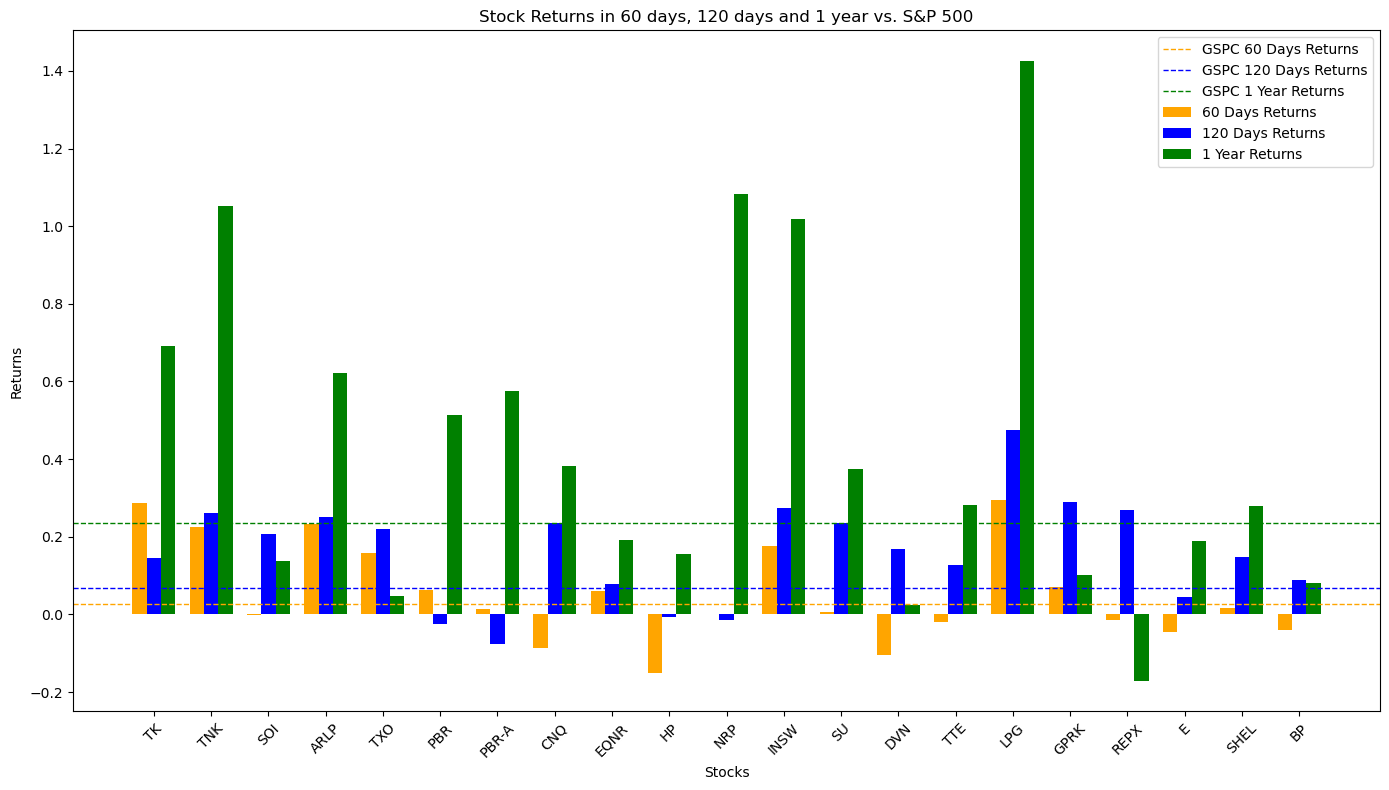

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [ ]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 5.47%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 16.17%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 43.15%
Return for Investing in S&P500 in 1 year is 23.62%
